In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import norm
from scipy.fft import fft, ifft

Un sistema es algo que hace algo sobre una entrada y da una salida.

Decir que el sistema está en reposo es que la salida y la entrada son 0.

Identificar propiedades:
- Memoria (Tienen entradas anteriores)
- Causal (No depende de entradas posteriores)
- Estable (Que si ingreso una salida acotada no diverga)
- Auto-regresivo (Recurrencia) (salidas previas influyen)
- Variante en el tiempo (Mantiene coeficientes constantes)
- Lineal (Se puede hacer matemáticamente)

$y(n) = 2 x(n)$

$1) x_1 -> y_1(n) = 2 x_1 (n) $ 

$x_2 -> y_2(n) = 2 x_2 (n) $ 

$2)  x_1 + x_2 -> y_s(n) = 2 (x_1(n) + x_2(n) ) $

La suma de las salidas debe ser igual a la salida de la suma de las entradas.

$$y(n) = e^n x(n)$$
Es variante en el tiempo pero lineal.

$$y(n) = 2x(n) + 1$$
Es incremental pero no lineal. Incremental porque si hago la derivada vuela el coef.

Si tenemos algo que es invariante y lineal es muy útil porque podemos realizar muchas operaciones sobre ella.

# Guía 
## 1)
a.
$$y(n) = g(n) x(n) ~~~   ;  ~~~~g(n) = A sen(2 \pi f n t)$$

- fm = 100H<
- 0<=t<1s
- f = 5Hz
- A = 1

Para x1 y x2


Graficar:
- y1, y2, y1+y2
- y_s

Medir distancia para ver que sean iguales. Calcular la norma que queramos de la diferencia de 1-2:
$$d = || (y_1 + y_2) - y_s||_2$$

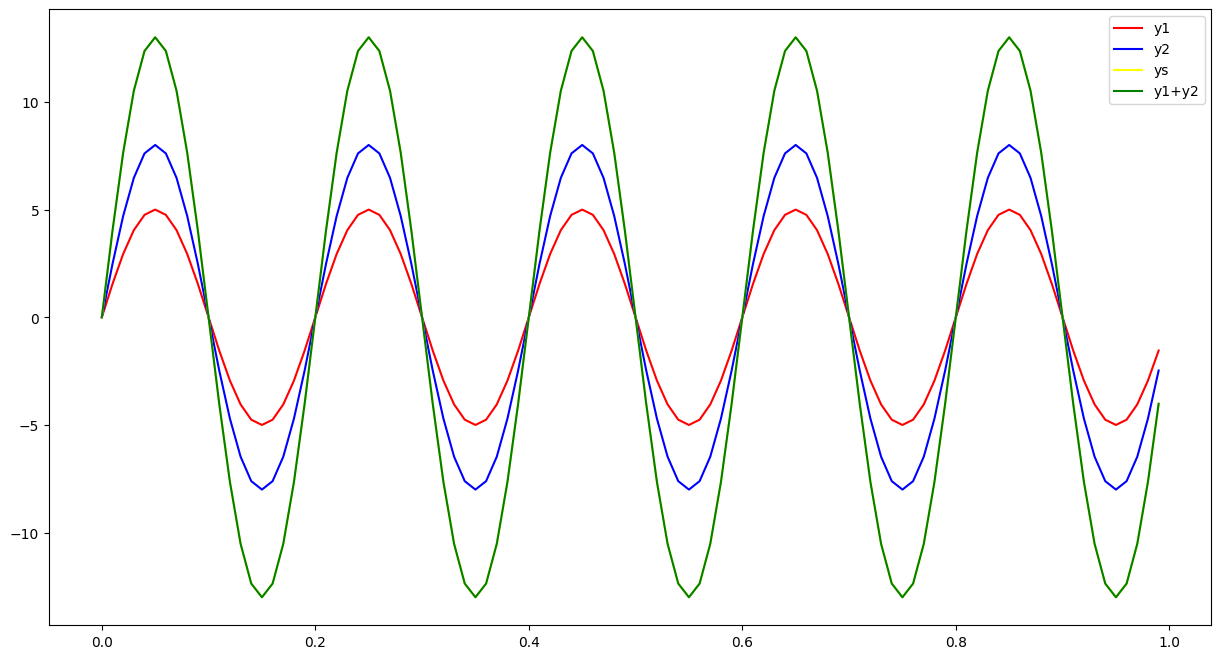

In [43]:
fm = 100
t = np.arange(0, 1, 1/fm)
xs = [5, 8]
f = 5
A = 1
plt.figure(figsize=(15,8))
colors = ["red", "blue"]
ys = []
count = 1
for x, i in zip(xs, colors):
    y = A*np.sin(2*np.pi*f*t) * x
    ys.append(y)
    plt.plot(t, y, color=i, label=f"y{count}")
    count += 1

ysum = A*np.sin(2*np.pi*f*t) * np.sum(xs)
plt.plot(t, ysum, color="yellow", label="ys")
y12 = ys[0]+ys[1]
plt.plot(t, y12, color="green", label="y1+y2")

plt.legend()
plt.show()

In [44]:
from scipy.linalg import norm

print("Distancia: ",norm(y12-ysum, 2))

Distancia:  4.351167857633658e-15


Ahora se entiende que no aparezca la amarilla ya que es igual a la verde. Por lo tanto, es lineal.


Vamos a probar una propiedad para verificar linealidad que no tenga que hacerlo con dos entradas.
- Prop: no agregan armónicos

$$y_L = 2x(n)$$

$$y_{NoL} = e^{x(n)}$$

En el espectro de la salida lineal tiene que estar en el mismo lugar, el no lineal agrega componentes armónicos por todos lados.

Los componentes armonicos son múltiplos de la frecuencia fundamental.

/tmp/ipykernel_7236/3331577831.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[:int(N/2)], use_line_collection=True, linefmt="red", label="Espectro de x")
/tmp/ipykernel_7236/3331577831.py:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, j[0:int(N/2)], use_line_collection=True, label=f"Espectro {i}")


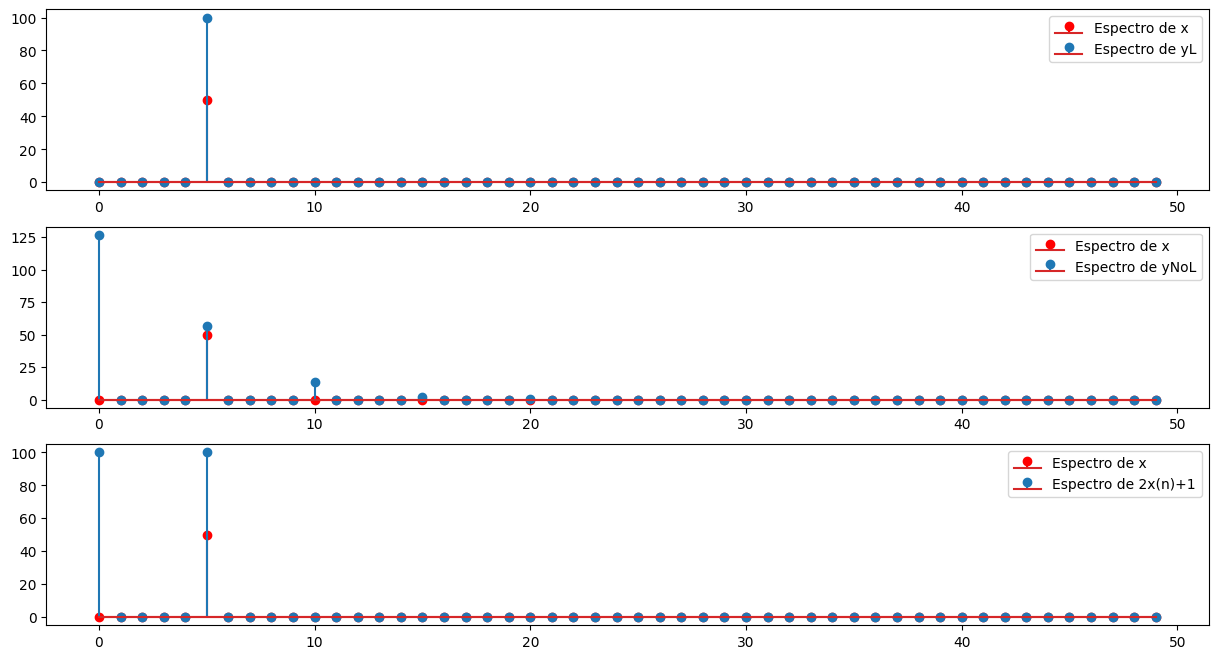

In [66]:
fm = 100
t = np.arange(0, 1, 1/fm)
x = np.sin(2*np.pi*5*t)

yL = 2 * x
yNoL = np.e**(x)
yNoL2 = 2*x + 1

ys = [yL, yNoL, yNoL2]
transf = [np.abs(fft(i)) for i in ys]
N = len(t)
f = np.arange(0, fm/2, fm/N)
pos = 1
plt.figure(figsize=(15,8))
labels = ["de yL", "de yNoL", "de 2x(n)+1"]

for i, j in zip(labels, transf):
    plt.subplot(int(f"{len(ys)}1{pos}"))
    Sabs = np.abs(fft(x))
    plt.stem(f, Sabs[:int(N/2)], use_line_collection=True, linefmt="red", label="Espectro de x")
    plt.stem(f, j[0:int(N/2)], use_line_collection=True, label=f"Espectro {i}")
    plt.legend()
    pos += 1


plt.show()

Como cambian el espectro de la entrada deducimos que son no lineales.

$$y(n) = \frac{1}{5}x(n-2)+\frac{1}{5}x(n-1)+\frac{1}{5}x(n)+\frac{1}{5}x(n+1)+\frac{1}{5}x(n+2)$$

Es un promediador, es pasa bajos. Se llama de mooving average. Va promediando de a ventanas.

Obtener la salida a:
- $x = sen(2\pi10t)+\frac{1}{10}sen(2\pi49t)$
- $f_m = 100Hz$
- $0\leq t<1$

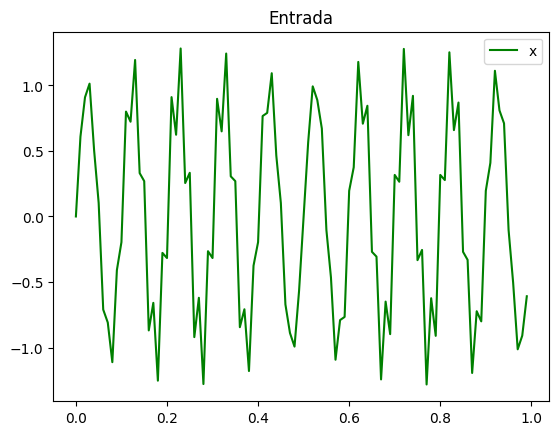

In [106]:
fm = 100 
t = np.arange(0, 1, 1/fm)
x = np.sin(2*np.pi*10*t) + (1/3)*np.sin(2*np.pi*49*t)

plt.title("Entrada")
plt.plot(t, x, color="green", label="x")
plt.legend()
plt.show()

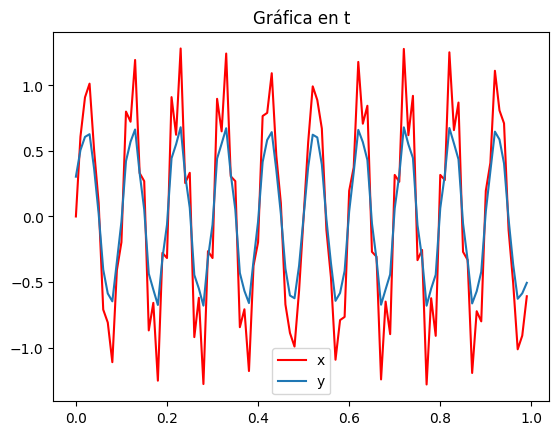

In [107]:
y = [(1/5)*x[0]+(1/5)*x[1]+(1/5)*x[2], (1/5)*x[0]+(1/5)*x[1]+(1/5)*x[2]+(1/5)*x[3]]
N = len(x)
for i in range(2, len(x[:N-2])):
    y.append((1/5)*x[i-2]+(1/5)*x[i-1]+(1/5)*x[i]+(1/5)*x[i+1]+(1/5)*x[i+2])
    
y.append((1/5)*x[-4]+(1/5)*x[-3]+(1/5)*x[-2]+(1/5)*x[i-1])
y.append((1/5)*x[-3]+(1/5)*x[-2]+(1/5)*x[-1])

plt.plot(t, x, color="red", label="x")
plt.plot(t, y, label="y")
plt.title("Gráfica en t")
plt.legend()
plt.show()

/tmp/ipykernel_7236/3544577963.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, j[:int(N/2)], use_line_collection=True, linefmt="red", label=f"Espectro de {k}")


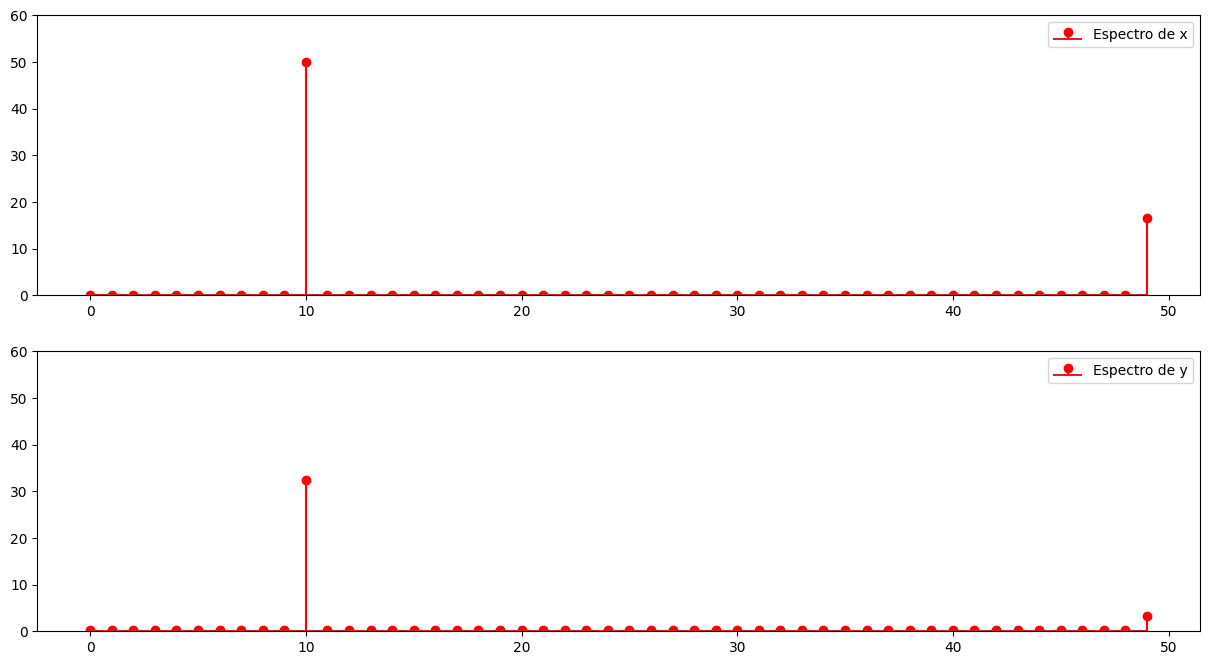

In [109]:
senales = [x, y]
transf = [np.abs(fft(i)) for i in senales]
labels = ["x", "y"]
pos = 1
N = len(t)
f = np.arange(0, fm/2, fm/N)
plt.figure(figsize=(15, 8))
for i, j, k in zip(senales, transf, labels):
    plt.subplot(int(f"{len(senales)}1{pos}"))
    plt.stem(f, j[:int(N/2)], use_line_collection=True, linefmt="red", label=f"Espectro de {k}")
    plt.ylim(0, 60)
    plt.legend()
    pos += 1

Tanto en tiempo como frecuencia se puede ver el suavizado, si quisiera que sea más añadiría más términos.

SUAVIZADO ES UN FILTRO PASA BAJOS.